In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

sys.version_info(major=3, minor=7, micro=5, releaselevel='final', serial=0)
matplotlib 3.1.2
numpy 1.17.4
pandas 0.25.3
sklearn 0.22
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


## 1. 准备并处理数据

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape)
print(housing.target.shape)

(20640, 8)
(20640,)


In [3]:
import pprint

pprint.pprint(housing.data[0:5])
pprint.pprint(housing.target[0:5])

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])
array([4.526, 3.585, 3.521, 3.413, 3.422])


In [4]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, 
                                                            random_state= 7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, 
                                                      random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

## 2.【重点】模型构建(多输出）

In [6]:
input_wide = keras.layers.Input(shape=[5])
input_deep = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_deep)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_wide, hidden2])
output = keras.layers.Dense(1)(concat)    # 第一个输出
output2 = keras.layers.Dense(1)(hidden2)  # 第二个输出
model = keras.models.Model(inputs=[input_wide, input_deep], outputs = [output, output2])    # 添加两个样本输出

    
model.summary()
model.compile(loss="mean_squared_error", optimizer="Adam")
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           210         input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
______________________________________________________________________________________________

## 3. 训练模型

In [7]:
x_train_scaled_wide = x_train_scaled[:, :5]
x_train_scaled_deep = x_train_scaled[:, 2:]
x_valid_scaled_wide = x_valid_scaled[:, :5]
x_valid_scaled_deep = x_valid_scaled[:, 2:]
x_test_scaled_wide = x_test_scaled[:, :5]
x_test_scaled_deep = x_test_scaled[:, 2:]

history = model.fit([x_train_scaled_wide, x_train_scaled_deep], 
                    [y_train, y_train], 
                   validation_data = ([x_valid_scaled_wide, x_valid_scaled_deep], [y_valid, y_valid]),   # 添加两个样本输出
                   epochs = 100,
                   callbacks = callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 116us/sample - loss: 3.4165 - dense_2_loss: 1.7119 - dense_3_loss: 1.7032 - val_loss: 1.4911 - val_dense_2_loss: 0.6776 - val_dense_3_loss: 0.8133
Epoch 2/100
11610/11610 [==============================] - 1s 44us/sample - loss: 1.1756 - dense_2_loss: 0.5535 - dense_3_loss: 0.6221 - val_loss: 1.1079 - val_dense_2_loss: 0.5136 - val_dense_3_loss: 0.5942
Epoch 3/100
11610/11610 [==============================] - 1s 44us/sample - loss: 1.0171 - dense_2_loss: 0.4695 - dense_3_loss: 0.5479 - val_loss: 1.0065 - val_dense_2_loss: 0.4585 - val_dense_3_loss: 0.5478
Epoch 4/100
11610/11610 [==============================] - 1s 44us/sample - loss: 0.9474 - dense_2_loss: 0.4286 - dense_3_loss: 0.5188 - val_loss: 0.9682 - val_dense_2_loss: 0.4459 - val_dense_3_loss: 0.5222
Epoch 5/100
11610/11610 [==============================] - 1s 45us/sample - loss: 0.8869 - dense_2_loss: 0.3941 - dens

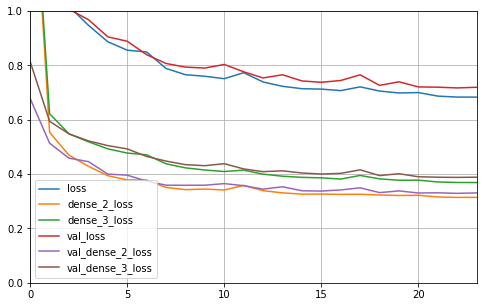

In [8]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

## 4. 模型预测

In [9]:
model.evaluate([x_test_scaled_wide, x_test_scaled_deep], [y_test, y_test])   # 添加两个测试输出结果

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.6980306877646335, 0.32667142, 0.37404203]